In [17]:
!pip install plotly
!pip install scikit-learn
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install tensorflow
!pip install graphviz

In [18]:
%matplotlib inline
import numpy as np
import plotly.express as px
import pandas as pd
import seaborn as sns

In [19]:
# Loading Datasets
data = pd.read_csv('./Crime_Data_from_2020_to_Present.csv', usecols=['DR_NO','AREA NAME' ,'Date Rptd', 'DATE OCC', 'TIME OCC', 'LOCATION', 'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Weapon Desc', 'Premis Desc', 'LAT', 'LON'], header=0)
data = data[data['DATE OCC'].str.contains('2024')]
data = data[data['Vict Age'] > 0]
data = data[data['Vict Sex'] != 'H']
data = data[data['Vict Sex'] != 'X']
data.dropna(inplace=True)

encoded = pd.DataFrame()


# Date to Number

In [20]:
# Time Conversion

# Combine DATE OCC and TIME OCC into a single datetime column
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')
#data['DATE OCC'] = pd.to_datetime(data['DATE OCC'] + ' ' + data['TIME OCC'], format='%Y-%m-%d %M:%S')
# Convert the datetime column to Unix timestamps
#encoded['UNIX_TIMESTAMP'] = data['DATE OCC'].apply(lambda x: x.timestamp())
encoded['TIME OCC'] = data['TIME OCC'].copy()
encoded['Vict Age'] = data['Vict Age'].copy()
data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Premis Desc,Weapon Desc,LOCATION,LAT,LON
877324,240604934,01/21/2024 12:00:00 AM,2024-01-21,1510,Hollywood,BATTERY - SIMPLE ASSAULT,22,F,MISSIONS/SHELTERS,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1300 N WESTERN AV,34.0944,-118.3125
877326,242107187,03/22/2024 12:00:00 AM,2024-03-22,1815,Topanga,BATTERY - SIMPLE ASSAULT,58,M,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",22000 GILMORE ST,34.1876,-118.6070
877328,240607797,03/25/2024 12:00:00 AM,2024-03-25,1422,Hollywood,OTHER ASSAULT,50,M,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",UNKNOWN WEAPON/OTHER WEAPON,1900 N VAN NESS AV,34.1053,-118.3159
877333,240904953,01/28/2024 12:00:00 AM,2024-01-26,1808,Van Nuys,BATTERY - SIMPLE ASSAULT,26,F,RESTAURANT/FAST FOOD,UNKNOWN WEAPON/OTHER WEAPON,14800 VICTORY BL,34.1867,-118.4553
877339,242005136,01/27/2024 12:00:00 AM,2024-01-27,1742,Olympic,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",53,M,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",MACE/PEPPER SPRAY,1900 W WASHINGTON BL,34.0437,-118.3029
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004879,240405919,02/27/2024 12:00:00 AM,2024-02-26,1545,Hollenbeck,BRANDISH WEAPON,18,M,SIDEWALK,REVOLVER,THOMAS ST,34.0703,-118.2052
1004884,241604405,01/14/2024 12:00:00 AM,2024-01-13,720,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",36,M,STREET,OTHER KNIFE,8700 LANKERSHIM BL,34.2271,-118.3878
1004886,242004546,01/16/2024 12:00:00 AM,2024-01-16,1510,Olympic,BATTERY - SIMPLE ASSAULT,80,F,BUS STOP,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",HOBART BL,34.0690,-118.3054
1004890,241414280,10/16/2024 12:00:00 AM,2024-10-16,1546,Pacific,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",46,M,VIDEO RENTAL STORE,UNKNOWN WEAPON/OTHER WEAPON,5200 W 98TH ST,33.9469,-118.3703


# Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the 'Crm Cd Desc' column
label_encoder.fit(data['Crm Cd Desc'])
# Transform the 'Crm Cd Desc' column
encoded['Crm Cd Desc'] = label_encoder.transform(data['Crm Cd Desc'])

# Fit the LabelEncoder to the 'AREA NAME' column
label_encoder.fit(data['AREA NAME'])
# Transform the 'AREA NAME' column
encoded['AREA NAME'] = label_encoder.transform(data['AREA NAME'])

# Fit the LabelEncoder to the 'AREA NAME' column
label_encoder.fit(data['Vict Sex'])
# Transform the 'AREA NAME' column
encoded['Vict Sex'] = label_encoder.transform(data['Vict Sex'])

sex_encoder = LabelEncoder()
sex_encoder.fit(data['Vict Sex'])

# Fit the LabelEncoder to the 'AREA NAME' column
label_encoder.fit(data['Premis Desc'])
# Transform the 'AREA NAME' column
encoded['Premis Desc'] = label_encoder.transform(data['Premis Desc'])

# Fit the LabelEncoder to the 'AREA NAME' column
label_encoder.fit(data['Weapon Desc'])
# Transform the 'AREA NAME' column
encoded['Weapon Desc'] = label_encoder.transform(data['Weapon Desc'])

# Fit the LabelEncoder to the 'AREA NAME' column
label_encoder.fit(data['LOCATION'])
# Transform the 'AREA NAME' column
encoded['LOCATION'] = label_encoder.transform(data['LOCATION'])


encoded.to_csv('encoded.csv', index=True)
data.to_csv('data.csv', index=True)
encoded


,TIME OCC,Vict Age,Crm Cd Desc,AREA NAME,Vict Sex,Premis Desc,Weapon Desc,LOCATION
877324,1510,22,4,6,0,87,58,1704
877326,1815,58,4,16,1,188,58,4098
877328,1422,50,43,6,1,151,68,3391
877333,1808,26,4,17,0,182,68,2330
877339,1742,53,2,11,1,151,32,3435
...,...,...,...,...,...,...,...,...
1004879,1545,18,10,5,1,188,43,9995
1004884,720,36,2,3,1,199,37,8480
1004886,1510,80,4,11,0,21,58,9504
1004890,1546,46,75,12,1,225,68,6209


             TIME OCC  Vict Age  Crm Cd Desc  AREA NAME  Vict Sex  \
TIME OCC     1.000000 -0.008002    -0.033516   0.007877  0.015089   
Vict Age    -0.008002  1.000000    -0.014113   0.020882  0.063123   
Crm Cd Desc -0.033516 -0.014113     1.000000   0.031295 -0.098890   
AREA NAME    0.007877  0.020882     0.031295   1.000000  0.017886   
Vict Sex     0.015089  0.063123    -0.098890   0.017886  1.000000   
Premis Desc  0.010480  0.038862     0.115851  -0.010531 -0.012380   
Weapon Desc -0.005530  0.049007     0.132798   0.036133 -0.152578   
LOCATION     0.006042 -0.009212    -0.002337  -0.040352  0.049734   

             Premis Desc  Weapon Desc  LOCATION  
TIME OCC        0.010480    -0.005530  0.006042  
Vict Age        0.038862     0.049007 -0.009212  
Crm Cd Desc     0.115851     0.132798 -0.002337  
AREA NAME      -0.010531     0.036133 -0.040352  
Vict Sex       -0.012380    -0.152578  0.049734  
Premis Desc     1.000000     0.014613  0.060607  
Weapon Desc     0.014613    

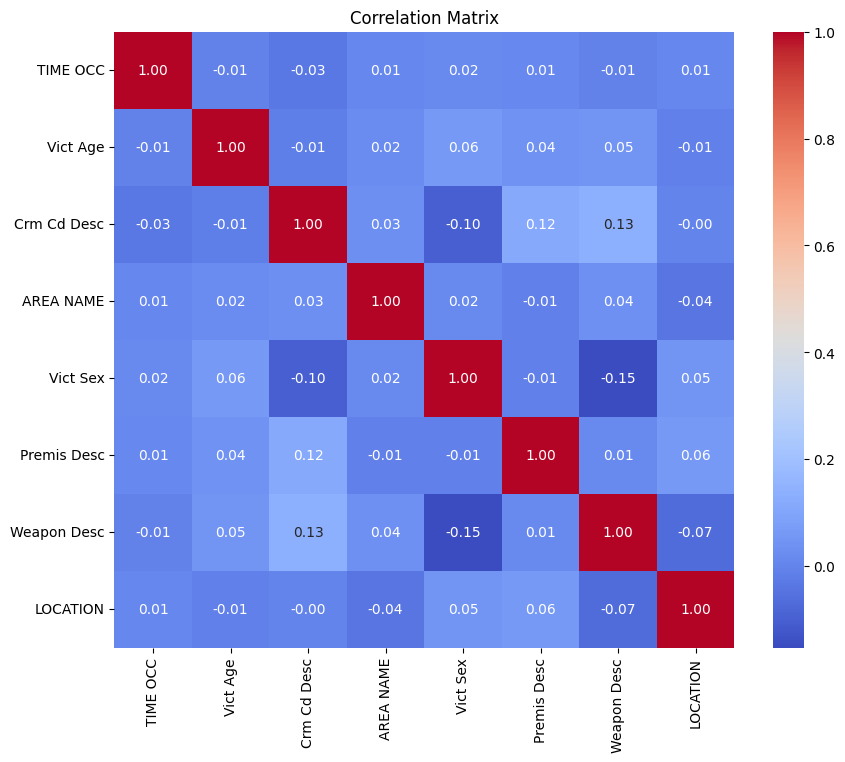

In [22]:
import matplotlib.pyplot as plt

# Assuming 'encoded' is your DataFrame with encoded data
# Compute the correlation matrix
correlation_matrix = encoded.corr()

# Display the correlation matrix
print(correlation_matrix)

# Optionally, visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Scale the encoded data using Min-Max scaling
scaled_encoded = min_max_scaler.fit_transform(encoded)

# Check the scaled data
scaled_encoded

array([[0.63994911, 0.20618557, 0.04597701, ..., 0.38325991, 0.82857143,
        0.16763404],
       [0.76929601, 0.57731959, 0.04597701, ..., 0.82819383, 0.82857143,
        0.40314806],
       [0.60262935, 0.49484536, 0.49425287, ..., 0.66519824, 0.97142857,
        0.33359567],
       ...,
       [0.63994911, 0.80412371, 0.04597701, ..., 0.09251101, 0.82857143,
        0.93497295],
       [0.65521628, 0.45360825, 0.86206897, ..., 0.99118943, 0.97142857,
        0.61082145],
       [0.63570823, 0.70103093, 0.02298851, ..., 0.82819383, 0.8       ,
        0.92444663]])

# Data Describe

In [24]:
data.describe()

,DR_NO,DATE OCC,TIME OCC,Vict Age,LAT,LON
count,2.128600e+04,21286,21286.000000,21286.000000,21286.000000,21286.000000
mean,2.411501e+08,2024-03-17 00:27:03.602367744,1343.105327,37.601428,34.061244,-118.355166
min,2.303006e+08,2024-01-01 00:00:00,1.000000,2.000000,33.705900,-118.667300
25%,2.406053e+08,2024-01-31 00:00:00,900.000000,26.000000,33.982825,-118.419000
50%,2.412086e+08,2024-03-01 00:00:00,1430.000000,35.000000,34.047300,-118.321300
75%,2.416076e+08,2024-04-10 00:00:00,1900.000000,48.000000,34.168500,-118.278900
max,2.520041e+08,2024-12-30 00:00:00,2359.000000,99.000000,34.327400,-118.161100
std,7.552802e+05,NaN,665.956656,15.611312,0.119489,0.100561


In [25]:
encoded.describe()

,TIME OCC,Vict Age,Crm Cd Desc,AREA NAME,Vict Sex,Premis Desc,Weapon Desc,LOCATION
count,21286.000000,21286.000000,21286.000000,21286.000000,21286.000000,21286.000000,21286.000000,21286.000000
mean,1343.105327,37.601428,23.988208,9.598421,0.519966,166.626374,54.308748,5521.075824
std,665.956656,15.611312,23.875907,6.049616,0.499613,47.382081,15.223081,2990.332060
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,900.000000,26.000000,4.000000,4.000000,0.000000,151.000000,58.000000,3020.000000
50%,1430.000000,35.000000,13.000000,10.000000,1.000000,188.000000,58.000000,5761.500000
75%,1900.000000,48.000000,37.000000,15.000000,1.000000,199.000000,66.000000,8108.750000
max,2359.000000,99.000000,87.000000,20.000000,1.000000,227.000000,70.000000,10165.000000


# Regression

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Daten skalieren
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(encoded_)
X_test_scaled = scaler.transform(X_test)

# Modell erstellen
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Ausgabe für Regression
])

# Modell kompilieren
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Modell trainieren
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32, verbose=1)

# Vorhersagen auf den Testdaten
y_pred_nn = model.predict(X_test_scaled).flatten()

# Metriken berechnen
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Mean Squared Error (MSE): {mse_nn:.2f}")
print(f"R²-Wert: {r2_nn:.2f}")

# Scatter-Plot: Tatsächliche vs. Vorhergesagte Werte
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_nn, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Tatsächliche Vict Age")
plt.ylabel("Vorhergesagte Vict Age")
plt.title("Actual vs. Predicted Vict Age (Neural Network Regression)")
plt.show()


/home/maylis/Dokumente/data-science-exam/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Beste Hyperparameter: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Bestes CV-R²: 0.1381541913332577
Test MSE: 204.87753427598153
Test R²: 0.1364466723669001


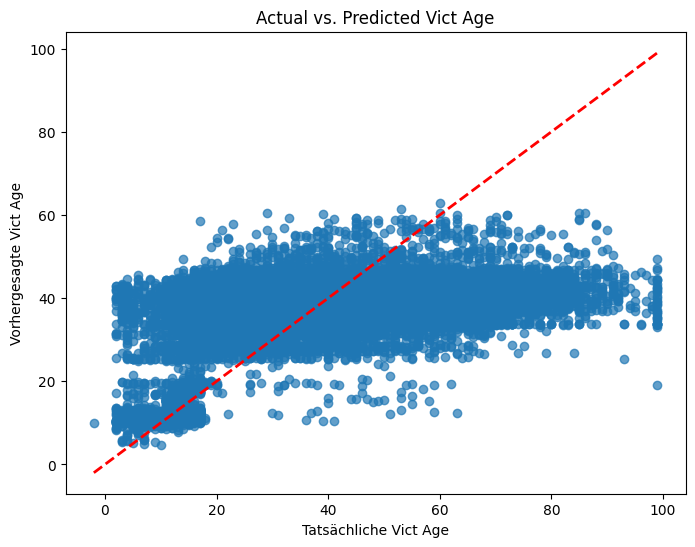

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

encoded_regression = encoded.copy()

# 3. Entfernen der Spalten "UNIX_TIMESTAMP" und "LOCATION"
encoded_regression = encoded_regression.drop(columns=['LOCATION'])

# 4. Feature-Engineering aus "TIME OCC" (Format HHMM -> Stunde)
encoded_regression['hour'] = encoded_regression['TIME OCC'] // 100
encoded_regression = encoded_regression.drop(columns=['TIME OCC'])

# 5. One-Hot-Encoding für die kategorialen Variablen
categorical_cols = ['Crm Cd Desc', 'AREA NAME', 'Vict Sex', 'Premis Desc', 'Weapon Desc']
data = pd.get_dummies(encoded_regression, columns=categorical_cols, drop_first=True)

# 6. Definieren von Zielvariable (y) und Features (X)
target = 'Vict Age'
X = encoded_regression.drop(columns=[target])
y = encoded_regression[target]

# 7. Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



# 8. Random-Forest-Regressor mit Hyperparameter-Tuning via GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Beste Hyperparameter:", grid_search.best_params_)
print("Bestes CV-R²:", grid_search.best_score_)

# 9. Vorhersagen auf Testdaten und Evaluierung
y_pred = best_rf.predict(X_test)
mse_value = mean_squared_error(y_test, y_pred)
r2_value = r2_score(y_test, y_pred)
print("Test MSE:", mse_value)
print("Test R²:", r2_value)

# 10. Scatter-Plot: Tatsächliche vs. Vorhergesagte Werte
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Tatsächliche Vict Age")
plt.ylabel("Vorhergesagte Vict Age")
plt.title("Actual vs. Predicted Vict Age")
plt.show()

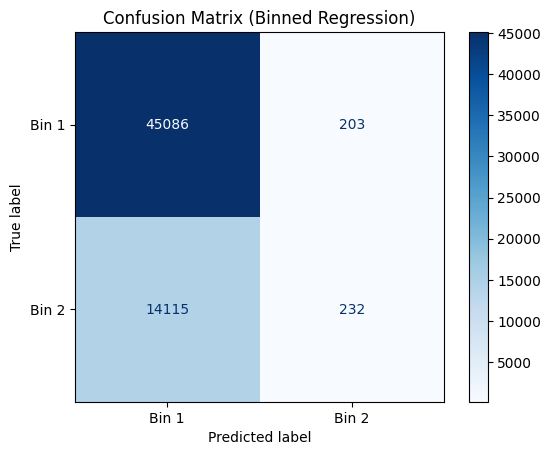

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Definiere die Anzahl der Bins (z. B. 5 Kategorien)
num_bins = 2

# Erstelle Bins basierend auf den tatsächlichen Werten
bins = np.linspace(y_test.min(), y_test.max(), num_bins + 1)

# Wandle die tatsächlichen und vorhergesagten Werte in Kategorien um
y_test_binned = np.digitize(y_test, bins, right=False) - 1
y_pred_binned = np.digitize(y_pred, bins, right=False) - 1

# Korrigiere die Binning-Ergebnisse, um sicherzustellen, dass sie innerhalb der gültigen Bereiche liegen
y_test_binned = np.clip(y_test_binned, 0, num_bins - 1)
y_pred_binned = np.clip(y_pred_binned, 0, num_bins - 1)

# Generiere die Confusion Matrix
cm = confusion_matrix(y_test_binned, y_pred_binned)

# Nutze den sex_encoder, um die Labels darzustellen
labels = [f"Bin {i}" for i in range(1, num_bins + 1)]

# Zeige die Confusion Matrix an
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Binned Regression)")
plt.show()

In [ ]:
# Classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# filtered data -> 70 training/ 30 test split -> use encoded data -> use fit training function -> train based on gender -> Accuracy
# todo: confusion matrix

encoded_classifier = encoded.copy()
X = encoded_classifier.drop(columns=['Vict Sex'])  # Drop VicSex from features
y = encoded_classifier['Vict Sex']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.59


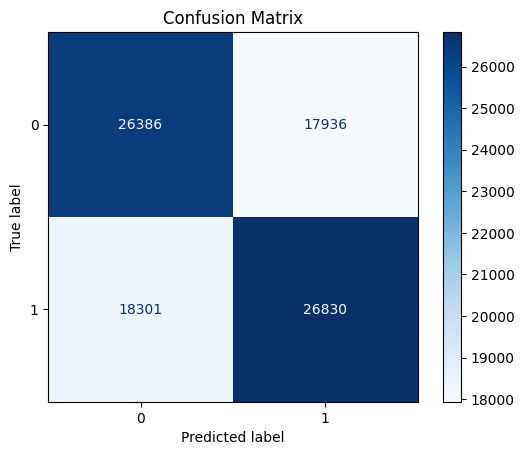

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_ if hasattr(clf, 'classes_') else np.unique(y_test))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

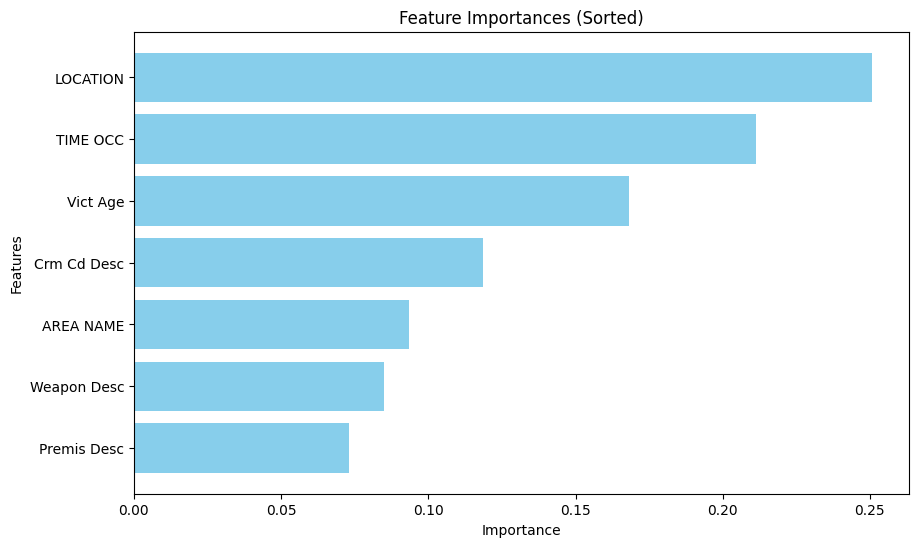

In [ ]:
# Sort feature importances in ascending order
importances = clf.feature_importances_
features = X.columns  # Use the column names of X as feature names
sorted_indices = importances.argsort()

# Plotting the sorted feature importances
plt.figure(figsize=(10, 6))
plt.barh(features[sorted_indices], importances[sorted_indices], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances (Sorted)')
plt.show()


In [ ]:
encoded.describe()

,TIME OCC,Vict Age,Crm Cd Desc,AREA NAME,Vict Sex,Premis Desc,Weapon Desc,LOCATION
count,298176.000000,298176.000000,298176.000000,298176.000000,298176.000000,298176.000000,298176.000000,298176.000000
mean,1347.074976,37.548941,30.528131,9.363175,0.505554,214.496804,60.101618,22099.572279
std,670.692464,15.446030,31.326087,6.091984,0.499970,60.610665,16.653190,11973.792140
min,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,900.000000,26.000000,4.000000,4.000000,0.000000,199.000000,65.000000,11700.000000
50%,1430.000000,35.000000,14.000000,9.000000,1.000000,245.000000,65.000000,23481.000000
75%,1910.000000,48.000000,53.000000,14.000000,1.000000,246.000000,65.000000,32195.000000
max,2359.000000,99.000000,113.000000,20.000000,1.000000,293.000000,78.000000,40564.000000


from sklearn.tree import export_graphviz
from graphviz import Source

# Export the decision tree to a DOT format
dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=sex_encoder.classes_, filled=True, rounded=True)

# Render the DOT file to an SVG
graph = Source(dot_data, format="svg")
svg = graph.pipe().decode("utf-8")

# Save the SVG to a file
with open("decision_tree.svg", "w") as f:
    f.write(svg)


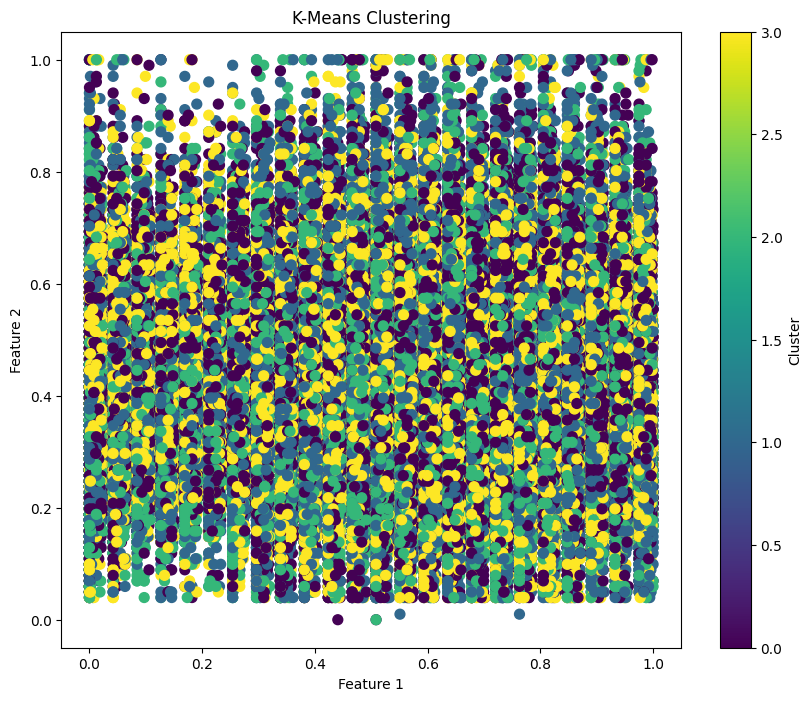

0    79053
1    78503
3    71691
2    68929
Name: count, dtype: int64


In [ ]:
from sklearn.cluster import KMeans

k = 4  # Adjust based on elbow method or domain knowledge

# Apply k-Means
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster = kmeans.fit_predict(scaled_encoded)

# Check results
# Visualize the K-Means clusters
plt.figure(figsize=(10, 8))
plt.scatter(scaled_encoded[:, 0], scaled_encoded[:, 1], c=cluster, cmap='viridis', s=50)
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()

# Check cluster counts

# Convert the cluster array to a Pandas Series to use value_counts()
print(pd.Series(cluster).value_counts())

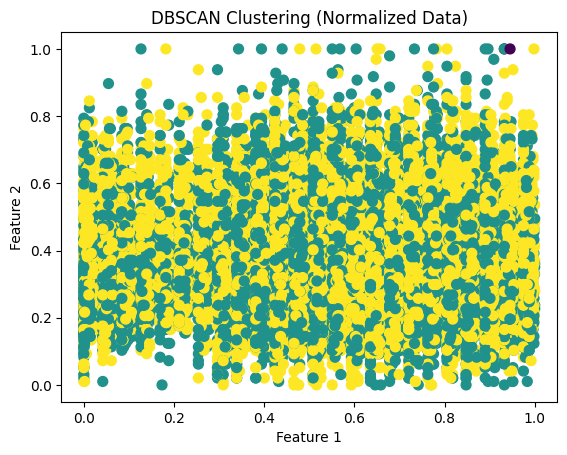

In [28]:
from sklearn.cluster import DBSCAN
# DBSCAN-Modell erstellen
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps: Radius, min_samples: Mindestanzahl von Punkten in einem Cluster
labels = dbscan.fit_predict(scaled_encoded)

# Ergebnisse visualisieren
plt.scatter(scaled_encoded[:, 0], scaled_encoded[:, 1], c=labels, cmap='viridis', s=50)
plt.title("DBSCAN Clustering (Normalized Data)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()


In [29]:
# Anzahl der Cluster (ohne Rauschen)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Anzahl der als Rauschen klassifizierten Punkte
n_noise = list(labels).count(-1)

print(f"Anzahl der Cluster: {n_clusters}")
print(f"Anzahl der als Rauschen klassifizierten Punkte: {n_noise}")

# Cluster-Labels und ihre Häufigkeiten
unique_labels, counts = np.unique(labels, return_counts=True)
cluster_info = dict(zip(unique_labels, counts))
print("Cluster-Informationen (Label: Anzahl der Punkte):", cluster_info)

Anzahl der Cluster: 2
Anzahl der als Rauschen klassifizierten Punkte: 3
Cluster-Informationen (Label: Anzahl der Punkte): {np.int64(-1): np.int64(3), np.int64(0): np.int64(10217), np.int64(1): np.int64(11066)}
